### Comparing menstrual cycle stage marker across tissue/organoid samples

This notebook contains code and results that were mainly used to identify menstrual cycle phase marker and to compare their expression across the used samples. The dataset that were used here can be found here: [reproductivecellatlas.org](https://www.reproductivecellatlas.org/) 

Code was contributed by: Olyssa Sperling

## 1. Importing the Data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
#import scikit-learn as sci
import scanpy as sc
import matplotlib.pyplot as plt
import anndata as ad

In [2]:
sc.settings.verbosity = 3            
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.3 scipy==1.7.2 pandas==1.3.4 scikit-learn==1.0.1 statsmodels==0.13.0 python-igraph==0.9.8 pynndescent==0.5.5


In [ ]:
adata_ti = sc.read_h5ad(
   '/home/vfs/PycharmProjects/Organoids_sc_WS2122/data/Garcia_Alonso_tissue/endometrium_all.h5ad')  # the directory with the `.mtx` file                # use gene symbols for the variable names (variables-axis )                              # write a cache file for faster subsequent reading
adata_ti.var_names_make_unique()

NameError: name 'adata_ti' is not defined

In [3]:
adata_or = sc.read_h5ad(
   '/home/vfs/PycharmProjects/Organoids_sc_WS2122/data/Garcia_Alsonso_organoid/endometrium_organoid.h5ad')  # the directory with the `.mtx` file                # use gene symbols for the variable names (variables-axis )                              # write a cache file for faster subsequent reading
adata_or.var_names_make_unique()

## 2. Subsetting the Samples:

### 2.1 Tissue samples:

In [3]:
adata_ti_pro_1 = adata_ti[adata_ti.obs["SampleID"] == "4861STDY7387181",:] #pro sample 1
adata_ti_pro_2 = adata_ti[adata_ti.obs["SampleID"] == "4861STDY7387182",:] #pro sample 2
adata_ti_sec_1 = adata_ti[adata_ti.obs["SampleID"] == "MRC_Endo8625698",:] #sec sample 1
adata_ti_sec_2 = adata_ti[adata_ti.obs["SampleID"] == "MRC_Endo8625699",:] #sec sample 2

data_list_ti = [adata_ti_pro_1, adata_ti_pro_2, adata_ti_sec_1, adata_ti_sec_2]

NameError: name 'adata_ti' is not defined

### 2.2 Organoid samples:

In [4]:
adata_or_1 = adata_or[adata_or.obs["sample_names"] == "WSSS_END9397530",:] #or sample 1 # day 6, comp: dibenzoazepine, no stim
adata_or_2 = adata_or[adata_or.obs["sample_names"] == "WSSS_END9397532",:] #or sample 2 # day 6, comp: XAV939, no stim
adata_or_3 = adata_or[adata_or.obs["sample_names"] == "WSSS_END9397528",:] #or sample 3 # day 6, no stim, no compound

adata_or_4 = adata_or[adata_or.obs["sample_names"] == "WSSS_END9397520",:]

data_list_or = [adata_or_1, adata_or_2, adata_or_3]
data_list_or_red = [adata_or_4]

In [7]:
adata_or_1.obs

,demultiplexed,sample_names,log2p1_count,percent_mito,n_genes,Days,Hormones,Inhibitor,IsClonal,Celltype_without_inhibitors,Celltype,CellCycle Phase
WSSS_END9397530_AAACCCAAGAGCAGAA,U1,WSSS_END9397530,12.654189,0.198914,2211,6,Ctrl,NOTCH-DBZ,False,filtered,NH_d2_d6,G1
WSSS_END9397530_AAACCCAAGAGCTGAC,U2,WSSS_END9397530,14.829426,0.124000,5095,6,Ctrl,NOTCH-DBZ,False,filtered,Low QC,G1
WSSS_END9397530_AAACCCAAGATTGTGA,U1,WSSS_END9397530,12.288290,0.195361,1849,6,Ctrl,NOTCH-DBZ,False,filtered,NH_d2_d6,G1
WSSS_END9397530_AAACCCAAGCAACCAG,B44,WSSS_END9397530,12.367688,0.162566,1965,6,Ctrl,NOTCH-DBZ,False,filtered,NH_d2_d6,G1
WSSS_END9397530_AAACCCAAGCGACTTT,B44,WSSS_END9397530,12.443462,0.198420,1784,6,Ctrl,NOTCH-DBZ,False,filtered,NH_d2_d6,G1
...,...,...,...,...,...,...,...,...,...,...,...,...
WSSS_END9397530_TTTGTTGGTATCTCGA,U2,WSSS_END9397530,12.349281,0.163696,1558,6,Ctrl,NOTCH-DBZ,False,filtered,NH_d2_WNTi,G1
WSSS_END9397530_TTTGTTGTCACATTGG,U1,WSSS_END9397530,13.301496,0.151857,3062,6,Ctrl,NOTCH-DBZ,False,filtered,NH_d2_d6,G1
WSSS_END9397530_TTTGTTGTCCACGTCT,B44,WSSS_END9397530,13.259302,0.121277,3003,6,Ctrl,NOTCH-DBZ,False,filtered,NH_d2_d6,G1
WSSS_END9397530_TTTGTTGTCGAGATAA,B44,WSSS_END9397530,12.733015,0.088732,2346,6,Ctrl,NOTCH-DBZ,False,filtered,NH_d2_d6,G1


In [8]:
adata_or_3.obs

,demultiplexed,sample_names,log2p1_count,percent_mito,n_genes,Days,Hormones,Inhibitor,IsClonal,Celltype_without_inhibitors,Celltype,CellCycle Phase
WSSS_END9397528_AAACCCAAGTAGATCA,U1,WSSS_END9397528,12.301782,0.052892,1915,6,Ctrl,Ctrl,False,NH_Day6,NH_d2_d6,G1
WSSS_END9397528_AAACCCAAGTGCTCAT,U2,WSSS_END9397528,13.544481,0.110739,3337,6,Ctrl,Ctrl,False,NH_Proliferative,NH_d2_d6,G2M
WSSS_END9397528_AAACCCATCAGTCCGG,B44,WSSS_END9397528,12.751962,0.091054,2432,6,Ctrl,Ctrl,False,NH_Day6,NH_d2_d6,G1
WSSS_END9397528_AAACGAAAGAAATTGC,U1,WSSS_END9397528,13.181774,0.176300,2594,6,Ctrl,Ctrl,False,NH_Day6,NH_d2_d6,G1
WSSS_END9397528_AAACGAAAGGATAATC,B44,WSSS_END9397528,13.326991,0.123114,2811,6,Ctrl,Ctrl,False,NH_Day6,NH_d2_d6,G1
...,...,...,...,...,...,...,...,...,...,...,...,...
WSSS_END9397528_TTTGTTGAGGTGCGAT,U1,WSSS_END9397528,12.519637,0.123999,1972,6,Ctrl,Ctrl,False,NH_Day6,NH_d2_d6,G1
WSSS_END9397528_TTTGTTGCACGACTAT,B44,WSSS_END9397528,13.467987,0.095499,3015,6,Ctrl,Ctrl,False,NH_Day6,NH_d2_d6,G1
WSSS_END9397528_TTTGTTGGTGGAGGTT,B44,WSSS_END9397528,12.396873,0.123516,1852,6,Ctrl,Ctrl,False,NH_Day6,NH_d2_d6,G1
WSSS_END9397528_TTTGTTGTCAGGAAAT,B44,WSSS_END9397528,12.858370,0.128350,2212,6,Ctrl,Ctrl,False,NH_Day6,NH_d2_d6,G1


In [10]:
adata_or_2.obs

,demultiplexed,sample_names,log2p1_count,percent_mito,n_genes,Days,Hormones,Inhibitor,IsClonal,Celltype_without_inhibitors,Celltype,CellCycle Phase
WSSS_END9397532_AAACCCAAGCATGCAG,U2,WSSS_END9397532,12.932031,0.129639,2397,6,Ctrl,WNT-XAV,False,filtered,NH_d6_WNTi,G1
WSSS_END9397532_AAACCCAAGGAGAATG,U1,WSSS_END9397532,11.574121,0.140748,1384,6,Ctrl,WNT-XAV,False,filtered,NH_d6_WNTi,G1
WSSS_END9397532_AAACCCAAGGAGAGTA,U1,WSSS_END9397532,12.903693,0.106108,2312,6,Ctrl,WNT-XAV,False,filtered,NH_d6_WNTi,G1
WSSS_END9397532_AAACCCACATGACACT,B44,WSSS_END9397532,13.062046,0.075430,3121,6,Ctrl,WNT-XAV,False,filtered,NH_d6_WNTi,G2M
WSSS_END9397532_AAACCCAGTAGACAAT,U1,WSSS_END9397532,12.689999,0.102921,2197,6,Ctrl,WNT-XAV,False,filtered,NH_d6_WNTi,G1
...,...,...,...,...,...,...,...,...,...,...,...,...
WSSS_END9397532_TTTGTTGGTTAATCGC,B44,WSSS_END9397532,12.660887,0.143938,2031,6,Ctrl,WNT-XAV,False,filtered,NH_d6_WNTi,G1
WSSS_END9397532_TTTGTTGGTTGTACGT,B44,WSSS_END9397532,12.671541,0.125709,2094,6,Ctrl,WNT-XAV,False,filtered,NH_d6_WNTi,G1
WSSS_END9397532_TTTGTTGTCCAGCACG,U2,WSSS_END9397532,11.594791,0.163325,1067,6,Ctrl,WNT-XAV,False,filtered,NH_d6_WNTi,G1
WSSS_END9397532_TTTGTTGTCGCAATGT,B44,WSSS_END9397532,11.306062,0.146187,1110,6,Ctrl,WNT-XAV,False,filtered,NH_d6_WNTi,G1


## 3. Looking at each Sample using UMAPs:

### 3.1 Tissue Samples:

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:20)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:24)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


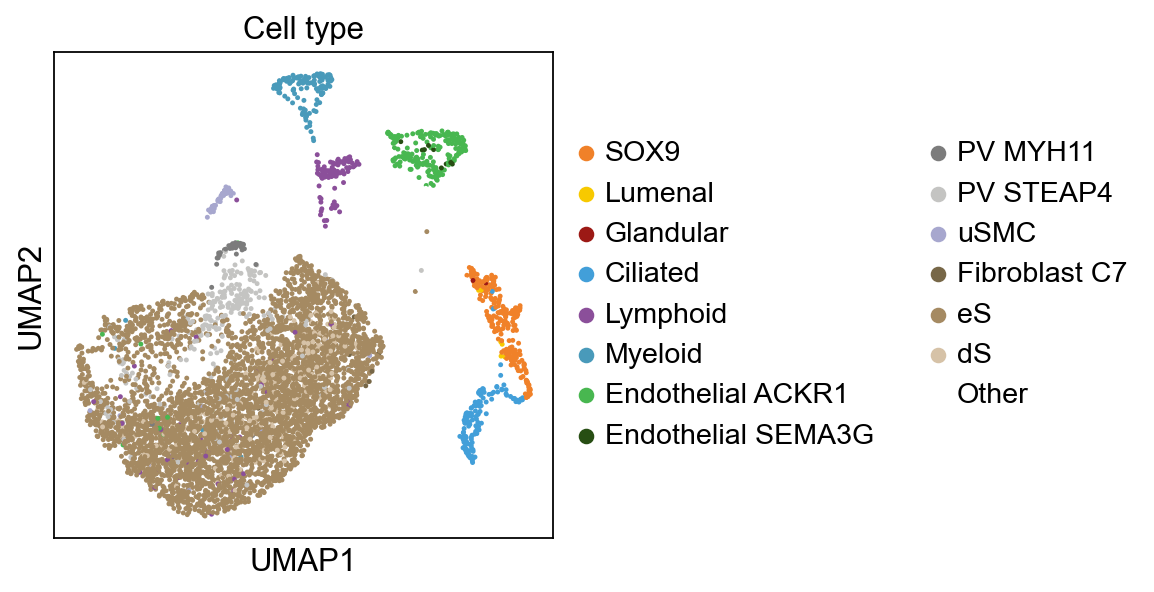

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:19)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:21)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


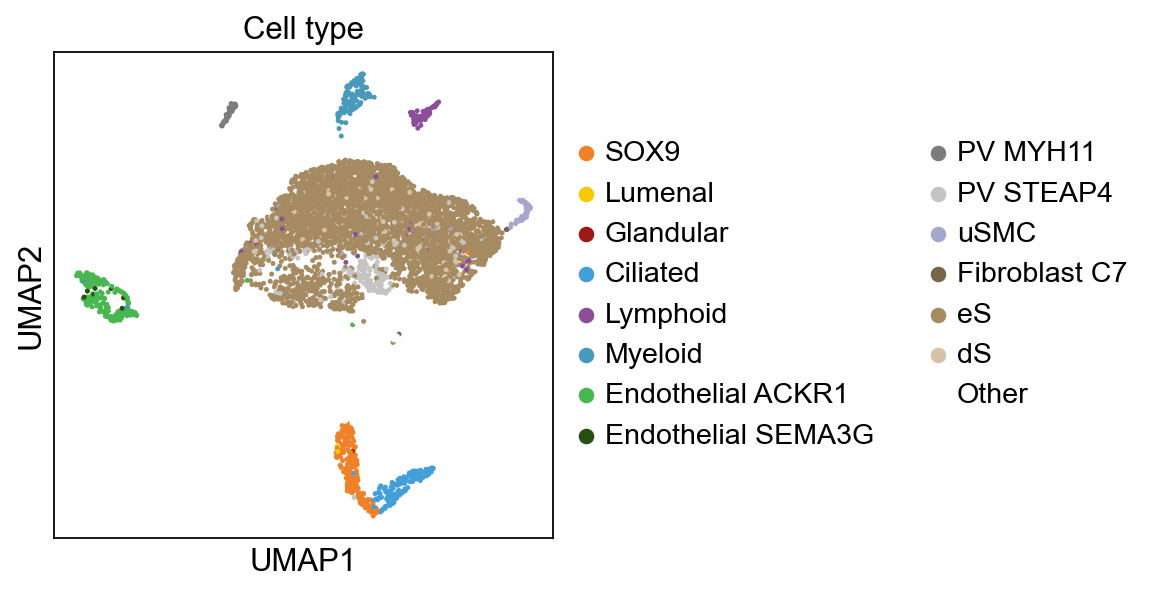

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:18)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:18)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


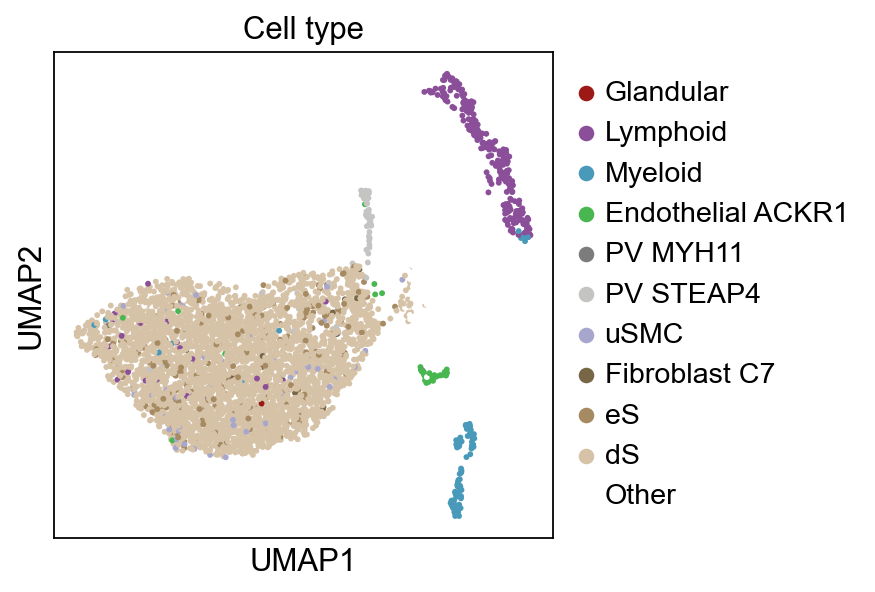

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:09)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:09)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


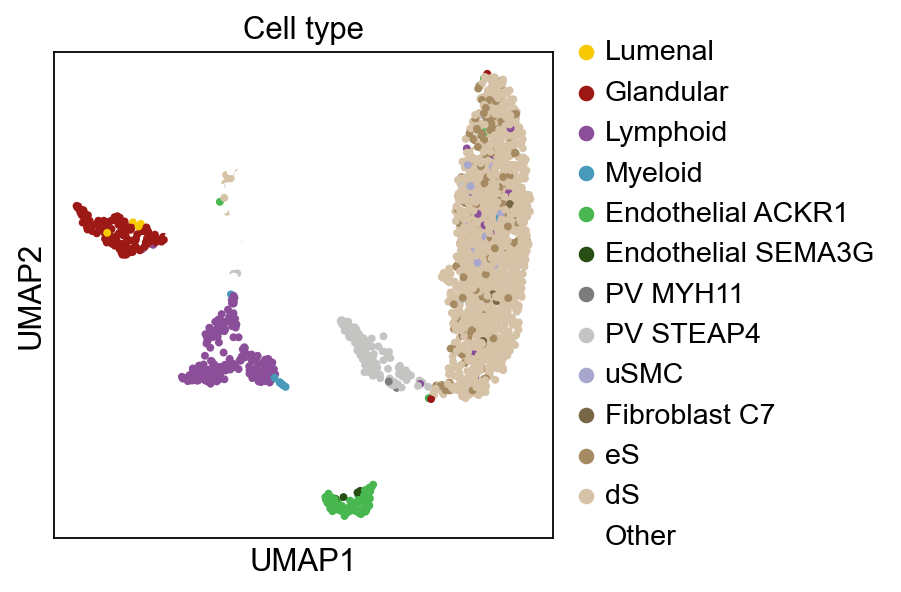

In [5]:
for item in data_list_ti:
    sc.pp.neighbors(item, n_neighbors=10, n_pcs=30)
    sc.tl.umap(item)
    sc.pl.umap(item, color="Cell type")

### 3.2 Organoid Samples:

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:28)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:32)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


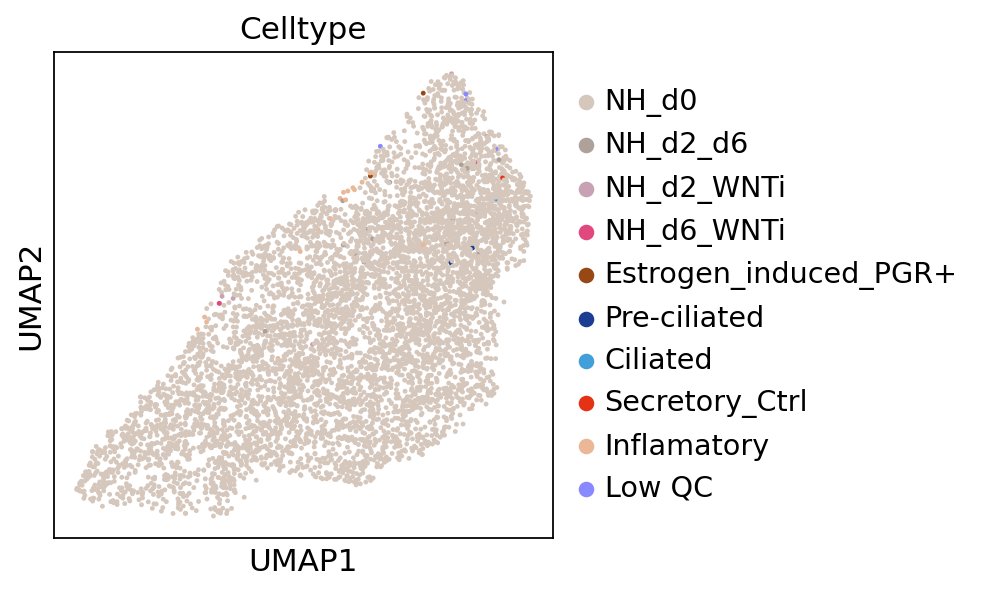

In [5]:
for item in data_list_or_red:
    sc.pp.neighbors(item, n_pcs=30)
    sc.tl.umap(item)
    sc.pl.umap(item, color="Celltype")

## 4. Merge both Tissue and Organoid Samples + UMAPs:

### 4.1 Tissue Samples:

In [13]:
adata_ti_merged_pro = ad.concat([adata_ti_pro_1,adata_ti_pro_2], join="outer")
adata_ti_merged_sec = ad.concat([adata_ti_sec_1,adata_ti_sec_2], join="outer")

data_list_2 = [adata_ti_merged_pro, adata_ti_merged_sec]

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:14)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


... storing 'SampleID' as categorical


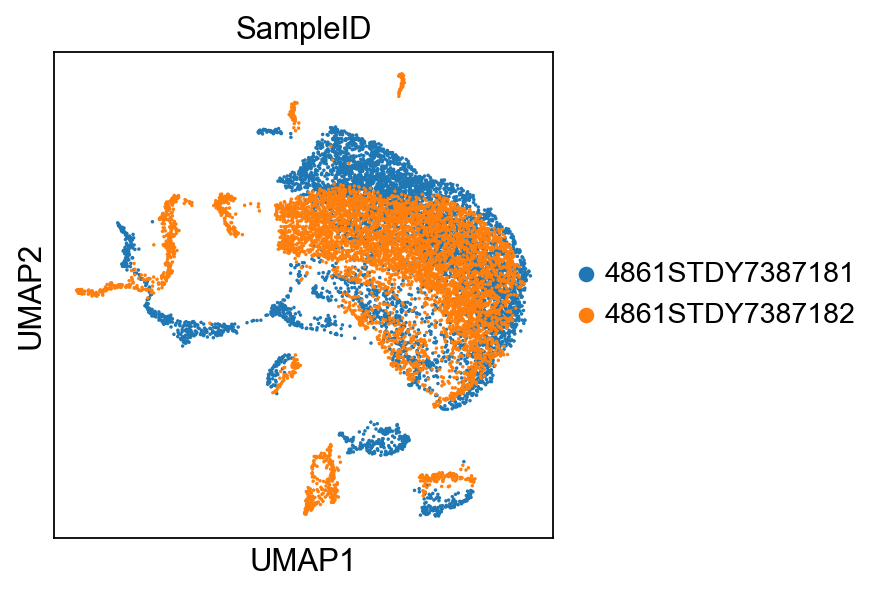

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


... storing 'SampleID' as categorical
... storing 'Cell type' as categorical


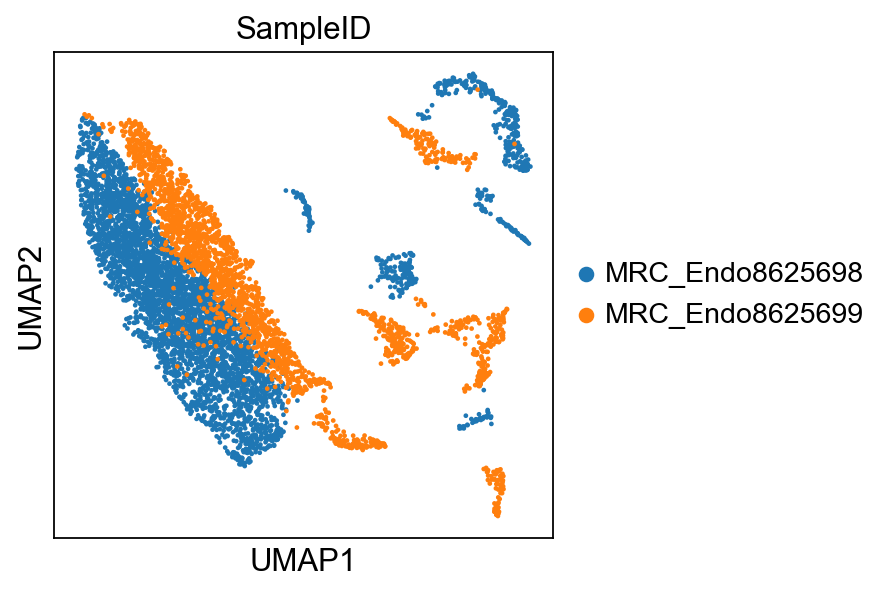

In [7]:
for item in data_list_2:
    sc.pp.neighbors(item, n_neighbors=10, n_pcs=30)
    sc.tl.umap(item)
    sc.pl.umap(item, color="SampleID")

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


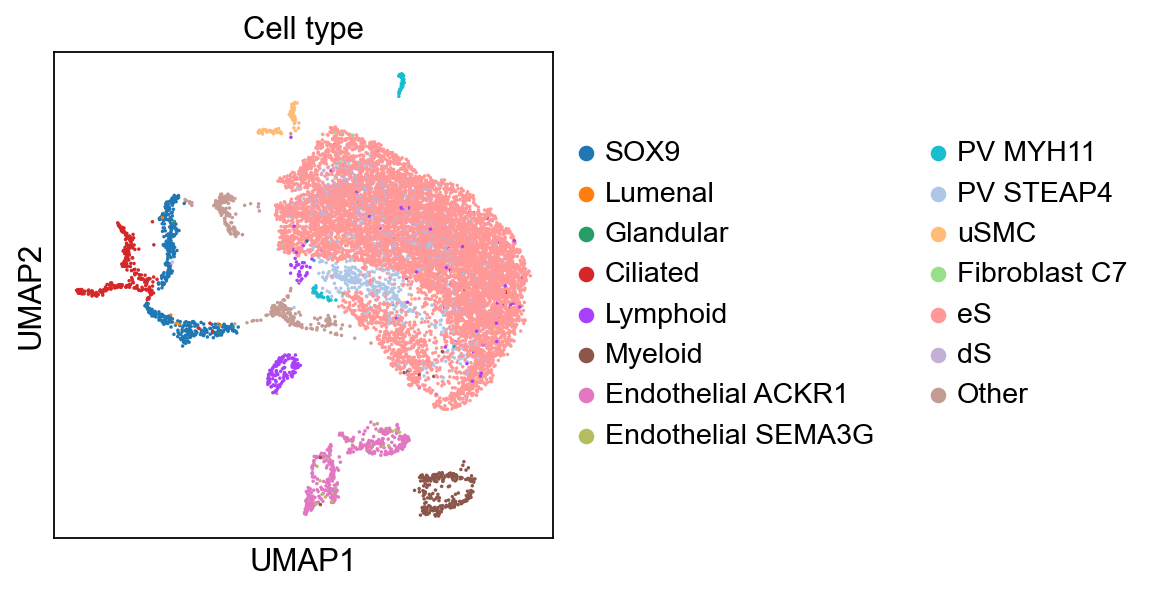

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


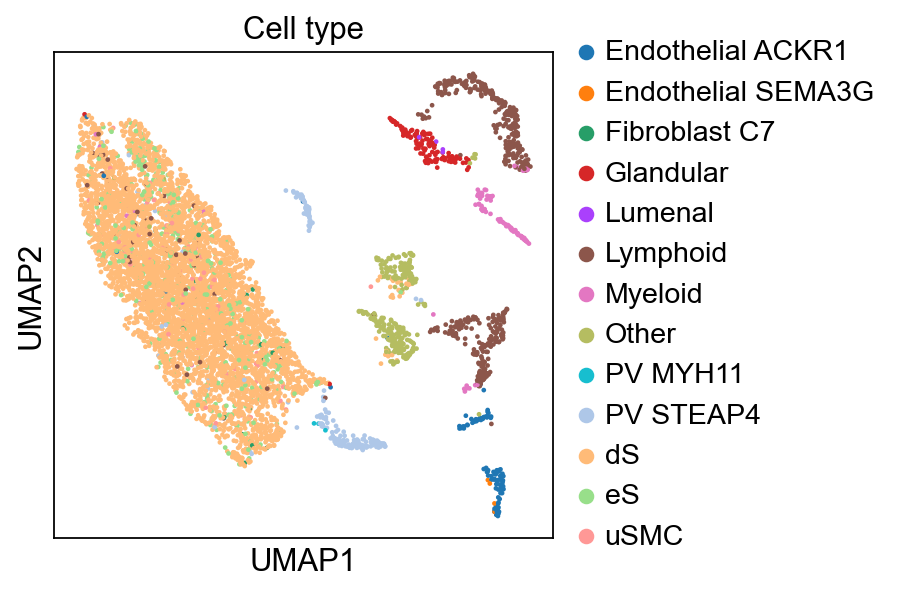

In [8]:
for item in data_list_2:
    sc.pp.neighbors(item, n_neighbors=10, n_pcs=30)
    sc.tl.umap(item)
    sc.pl.umap(item, color="Cell type")

### 4.2 Organoid samples:

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished (0:00:01)
computing UMAP
    finished (0:00:16)


... storing 'sample_names' as categorical
... storing 'Celltype_without_inhibitors' as categorical
... storing 'Celltype' as categorical


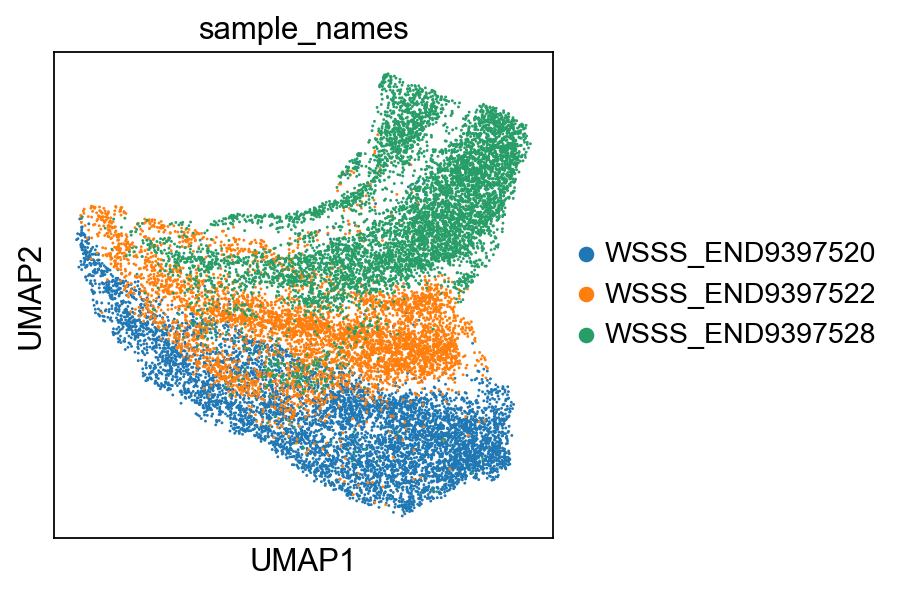

In [103]:
adata_or_merged = ad.concat([adata_or_1, adata_or_2, adata_or_3], join="outer")

sc.pp.neighbors(adata_or_merged, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata_or_merged)
sc.pl.umap(adata_or_merged, color="sample_names")

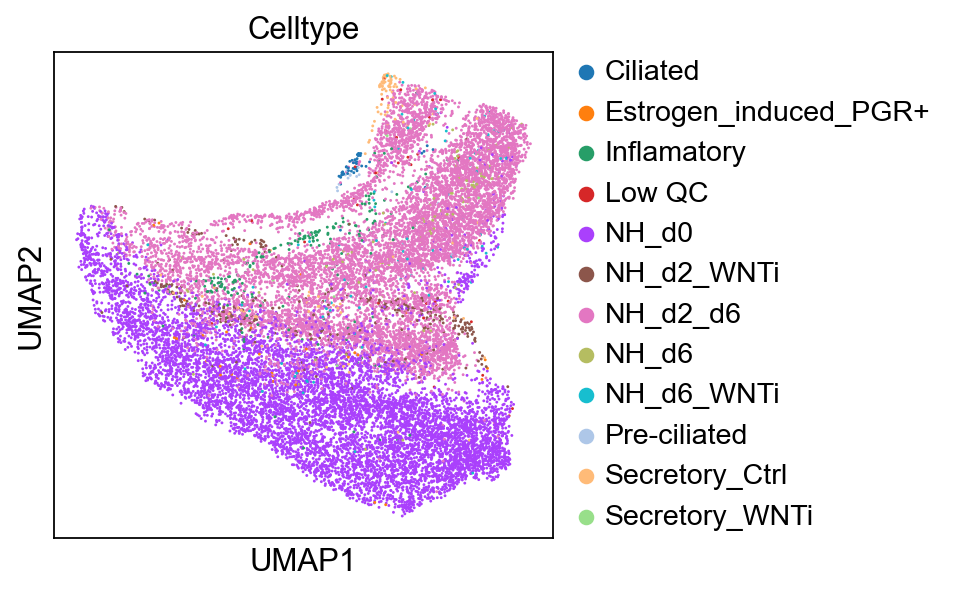

In [111]:
sc.pl.umap(adata_or_merged, color="Celltype")

## 5. Finding marker genes

In [13]:
adata_or_4.obs

,demultiplexed,sample_names,log2p1_count,percent_mito,n_genes,Days,Hormones,Inhibitor,IsClonal,Celltype_without_inhibitors,Celltype,CellCycle Phase
WSSS_END9397520_AAACCCAAGTAGGAAG,U2,WSSS_END9397520,13.902563,0.131979,3837,0,Ctrl,Ctrl,False,NH_Day0,NH_d0,G2M
WSSS_END9397520_AAACCCACACAAGCTT,U2,WSSS_END9397520,13.438143,0.086592,3261,0,Ctrl,Ctrl,False,NH_Day0,NH_d0,G2M
WSSS_END9397520_AAACCCACACATGTTG,U1,WSSS_END9397520,13.585785,0.124614,3421,0,Ctrl,Ctrl,False,NH_Day0,NH_d0,G1
WSSS_END9397520_AAACCCACACTCAAGT,U1,WSSS_END9397520,12.751125,0.095314,2488,0,Ctrl,Ctrl,False,NH_Day0,NH_d0,G1
WSSS_END9397520_AAACCCAGTCGCACAC,U1,WSSS_END9397520,13.382354,0.127189,3137,0,Ctrl,Ctrl,False,NH_Day0,NH_d0,G1
...,...,...,...,...,...,...,...,...,...,...,...,...
WSSS_END9397520_TTTGTTGCATACTTTC,B44,WSSS_END9397520,13.413231,0.104877,3083,0,Ctrl,Ctrl,False,NH_Day0,NH_d0,G1
WSSS_END9397520_TTTGTTGTCGCACGAC,B44,WSSS_END9397520,14.553150,0.118266,5040,0,Ctrl,Ctrl,False,NH_Day0,NH_d0,G1
WSSS_END9397520_TTTGTTGTCTAGACAC,B44,WSSS_END9397520,14.278594,0.091380,4782,0,Ctrl,Ctrl,False,NH_Day0,NH_d0,G1
WSSS_END9397520_TTTGTTGTCTGGGCAC,B44,WSSS_END9397520,14.098362,0.151377,3882,0,Ctrl,Ctrl,False,NH_Day0,NH_d0,G1


In [12]:
sc.pp.log1p(adata_or_4)

KeyError: 'Cell type'

ranking genes


Trying to set attribute `._uns` of view, copying.


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


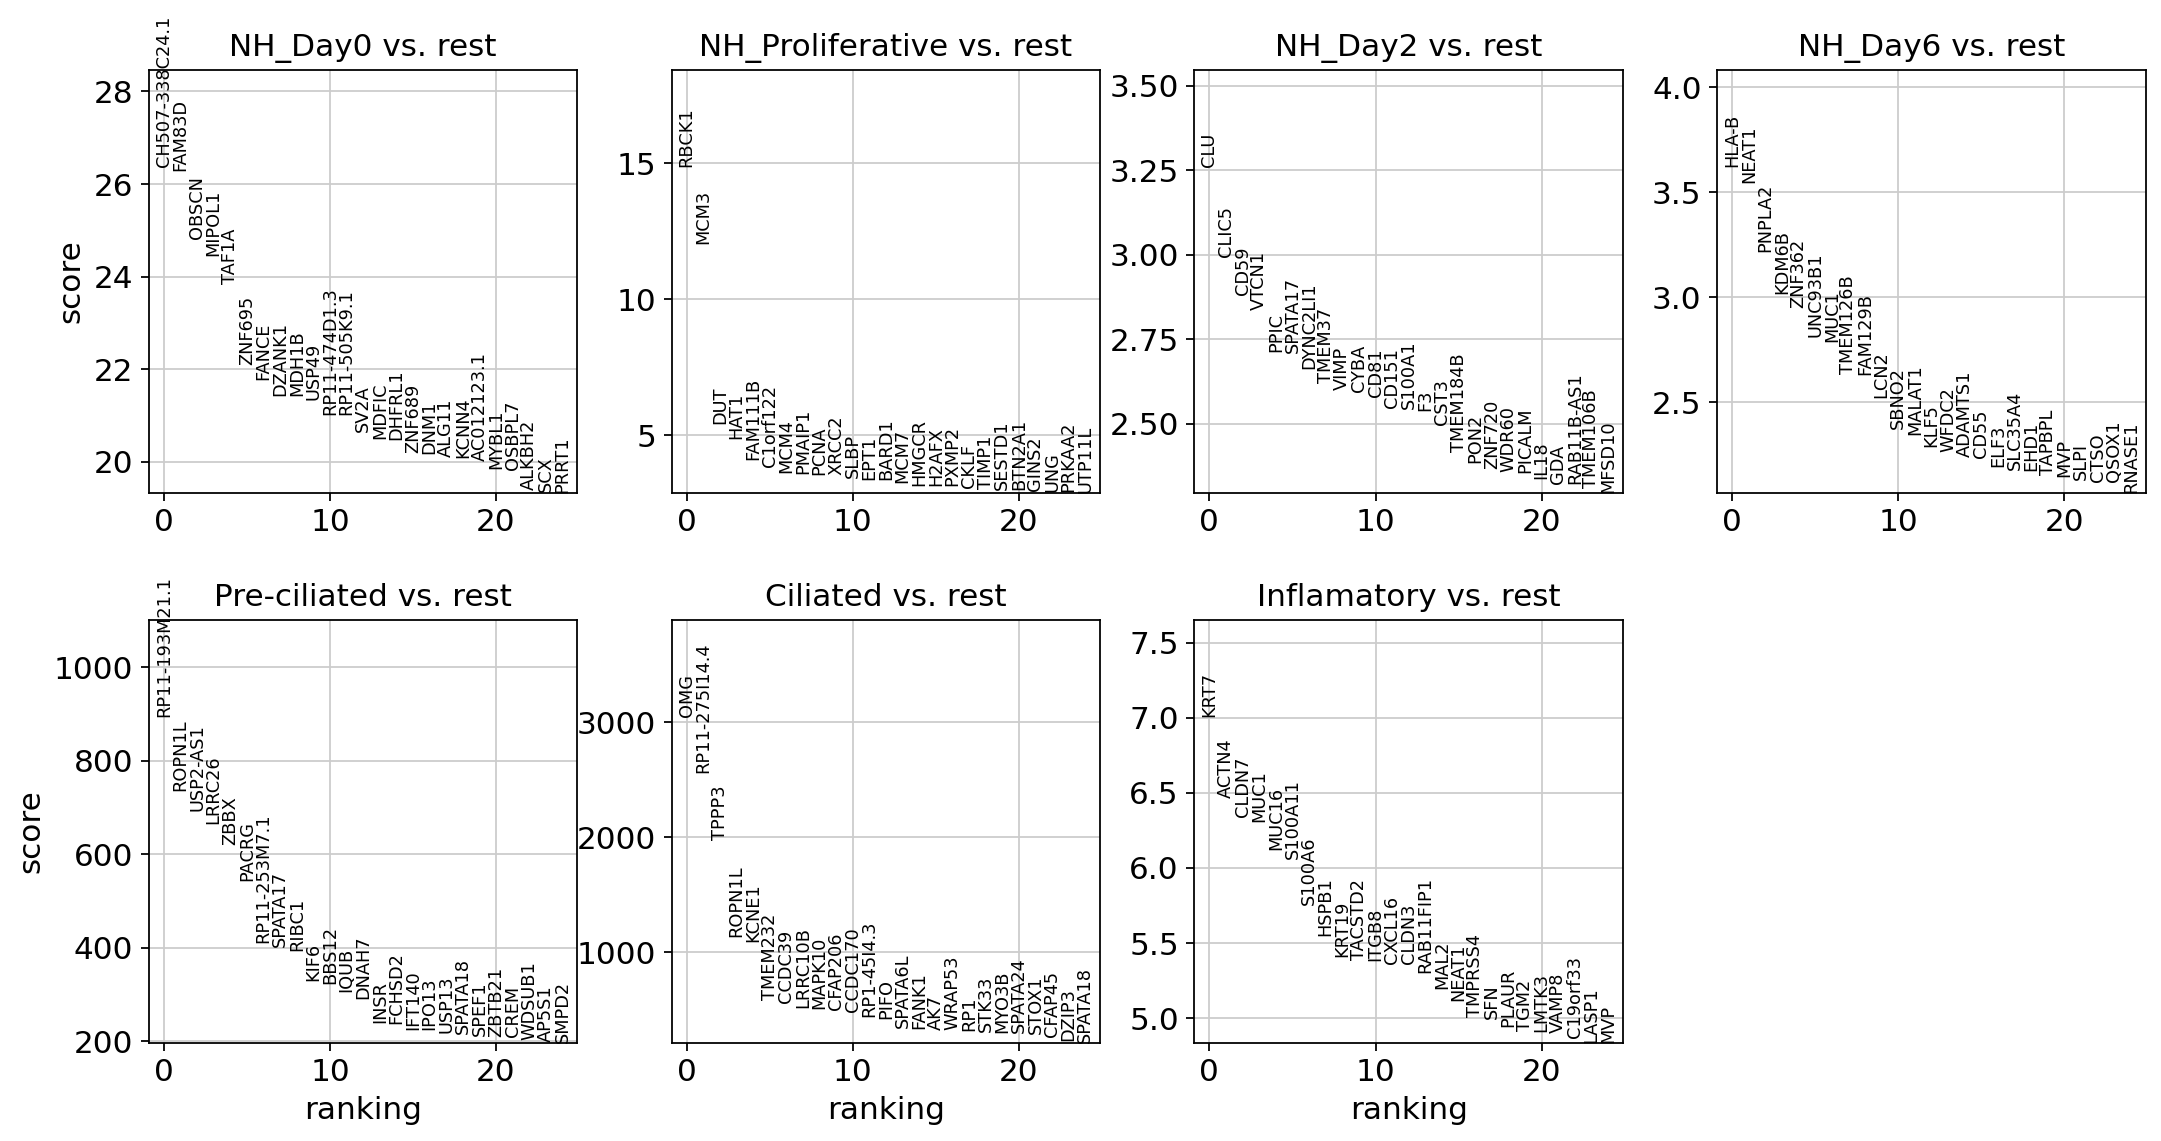

ranking genes
    finished (0:00:09)


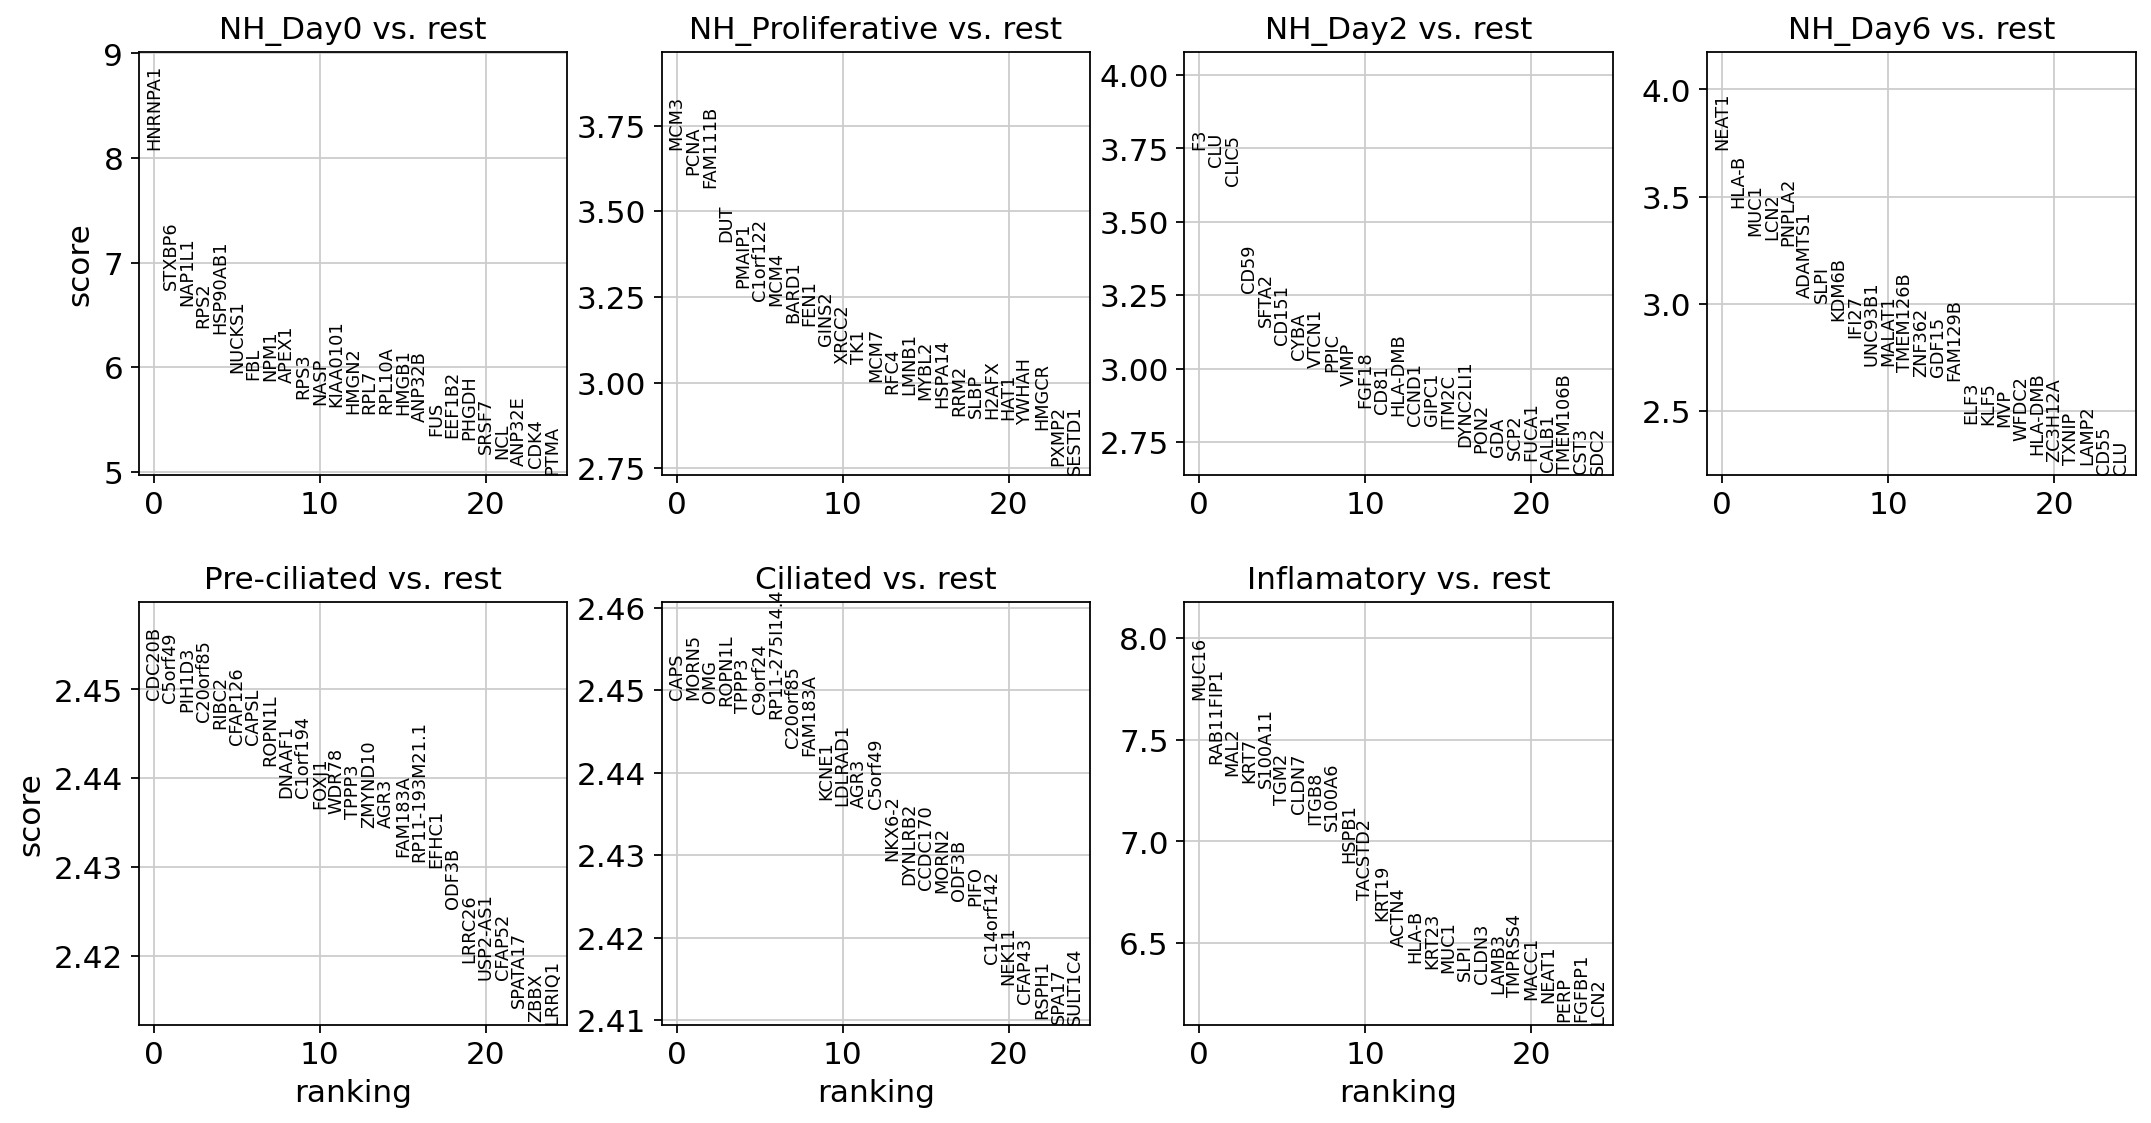

In [15]:
adata_or_4 = adata_or_4[adata_or_4.obs["Celltype_without_inhibitors"] != "Secretory",:]
    #t-test: compute a ranking for the highly differential genes in each cluster:

sc.tl.rank_genes_groups(adata_or_4, 'Celltype_without_inhibitors', method='t-test')
sc.pl.rank_genes_groups(adata_or_4, n_genes=25, sharey=False) #ln34

sc.settings.verbosity = 2  # reduce the verbosity #ln35

    #result of a Wilcoxon rank-sum test:

sc.tl.rank_genes_groups(adata_or_4, 'Celltype_without_inhibitors', method='wilcoxon')
sc.pl.rank_genes_groups(adata_or_4, n_genes=25, sharey=False) #ln36

#adata_or_4.write(results_file) #ln37

    #rank genes using logistic regression:

#sc.tl.rank_genes_groups(adata_or_merged, 'Celltype_without_inhibitors', method='logreg')
#sc.pl.rank_genes_groups(adata_or_merged, n_genes=25, sharey=False) #ln38

In [16]:
#show the 10 top ranked genes per cluster in a dataframe:

pd.DataFrame(adata_or_4.uns['rank_genes_groups']['names']).head(10) #ln41

,NH_Day0,NH_Proliferative,NH_Day2,NH_Day6,Pre-ciliated,Ciliated,Inflamatory
0,HNRNPA1,MCM3,F3,NEAT1,CDC20B,CAPS,MUC16
1,STXBP6,PCNA,CLU,HLA-B,C5orf49,MORN5,RAB11FIP1
2,NAP1L1,FAM111B,CLIC5,MUC1,PIH1D3,OMG,MAL2
3,RPS2,DUT,CD59,LCN2,C20orf85,ROPN1L,KRT7
4,HSP90AB1,PMAIP1,SFTA2,PNPLA2,RIBC2,TPPP3,S100A11
5,NUCKS1,C1orf122,CD151,ADAMTS1,CFAP126,C9orf24,TGM2
6,FBL,MCM4,CYBA,SLPI,CAPSL,RP11-275I14.4,CLDN7
7,NPM1,BARD1,VTCN1,KDM6B,ROPN1L,C20orf85,ITGB8
8,APEX1,FEN1,PPIC,IFI27,DNAAF1,FAM183A,S100A6
9,RPS3,GINS2,VIMP,UNC93B1,C1orf194,KCNE1,HSPB1


## 6. Comparing the merged Ti and Or Samples using Heatmaps:

In [157]:
adata_ti_merged = ad.concat([adata_ti_merged_pro,adata_ti_merged_sec], join="outer")

adata_pro_or_merged = ad.concat([adata_ti_merged_pro,adata_or_merged], join="outer")

adata_all_merged = ad.concat([adata_ti_merged_pro,adata_ti_merged_sec,adata_or_merged], join="outer")

KeyError: nan

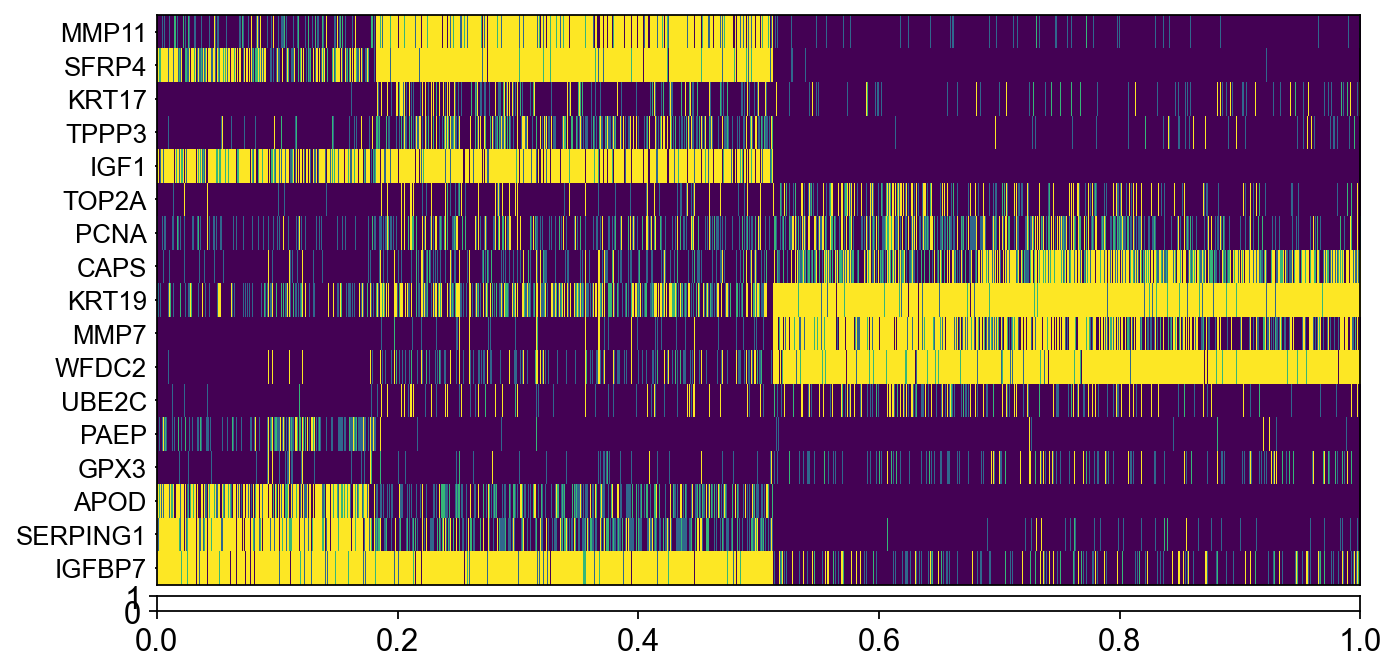

In [172]:
markers_menstrualflow = ['MMP1', 'MMP10', 'MMP3', 'MMP7', 'NCR3']
markers_proliferative = ['MMP11', 'SFRP4', 'KRT17', 'TPPP3', 'IGF1'] #eventuell: 'IGF1', 'IGFBP7'
markers_organoids = ['TOP2A', 'PCNA', 'CAPS', 'KRT19', 'MMP7', 'WFDC2', 'UBE2C']
markers_secretory = ['PAEP','GPX3', 'APOD', 'SERPING1', 'IGFBP7'] #gar nicht: 'KRT5', 'SCGB2A2'
#more_markers = ['ALDOA', 'CDK1', 'KIF20A', 'CKAP2', 'UBE2S', 'FAM83D', 'TOP2A', 'HJURP', 'CKS2']

markers = markers_proliferative + markers_organoids + markers_secretory

#adata_all_merged.obs['Stage'].cat.reorder_categories(['proliferative', 'late-secretory', 'organoid'], inplace = True)
sc.pl.heatmap(adata_all_merged, markers, groupby='Stage', swap_axes=True, vmax=3, cmap='viridis', figsize=[10,5])

ranking genes


... storing 'SampleID' as categorical
... storing 'DonorID' as categorical
... storing 'BiopsyType' as categorical
... storing 'Location' as categorical
... storing 'Binary Stage' as categorical
... storing 'Stage' as categorical
... storing 'Broad cell type' as categorical
... storing 'Cell type' as categorical
... storing 'demultiplexed' as categorical
... storing 'sample_names' as categorical
... storing 'Hormones' as categorical
... storing 'Inhibitor' as categorical
... storing 'Celltype_without_inhibitors' as categorical
... storing 'Celltype' as categorical


C:\Users\Schlumi\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


    finished (0:00:19)
    using 'X_pca' with n_pcs = 30
Storing dendrogram info using `.uns['dendrogram_Celltype']`


KeyError: nan

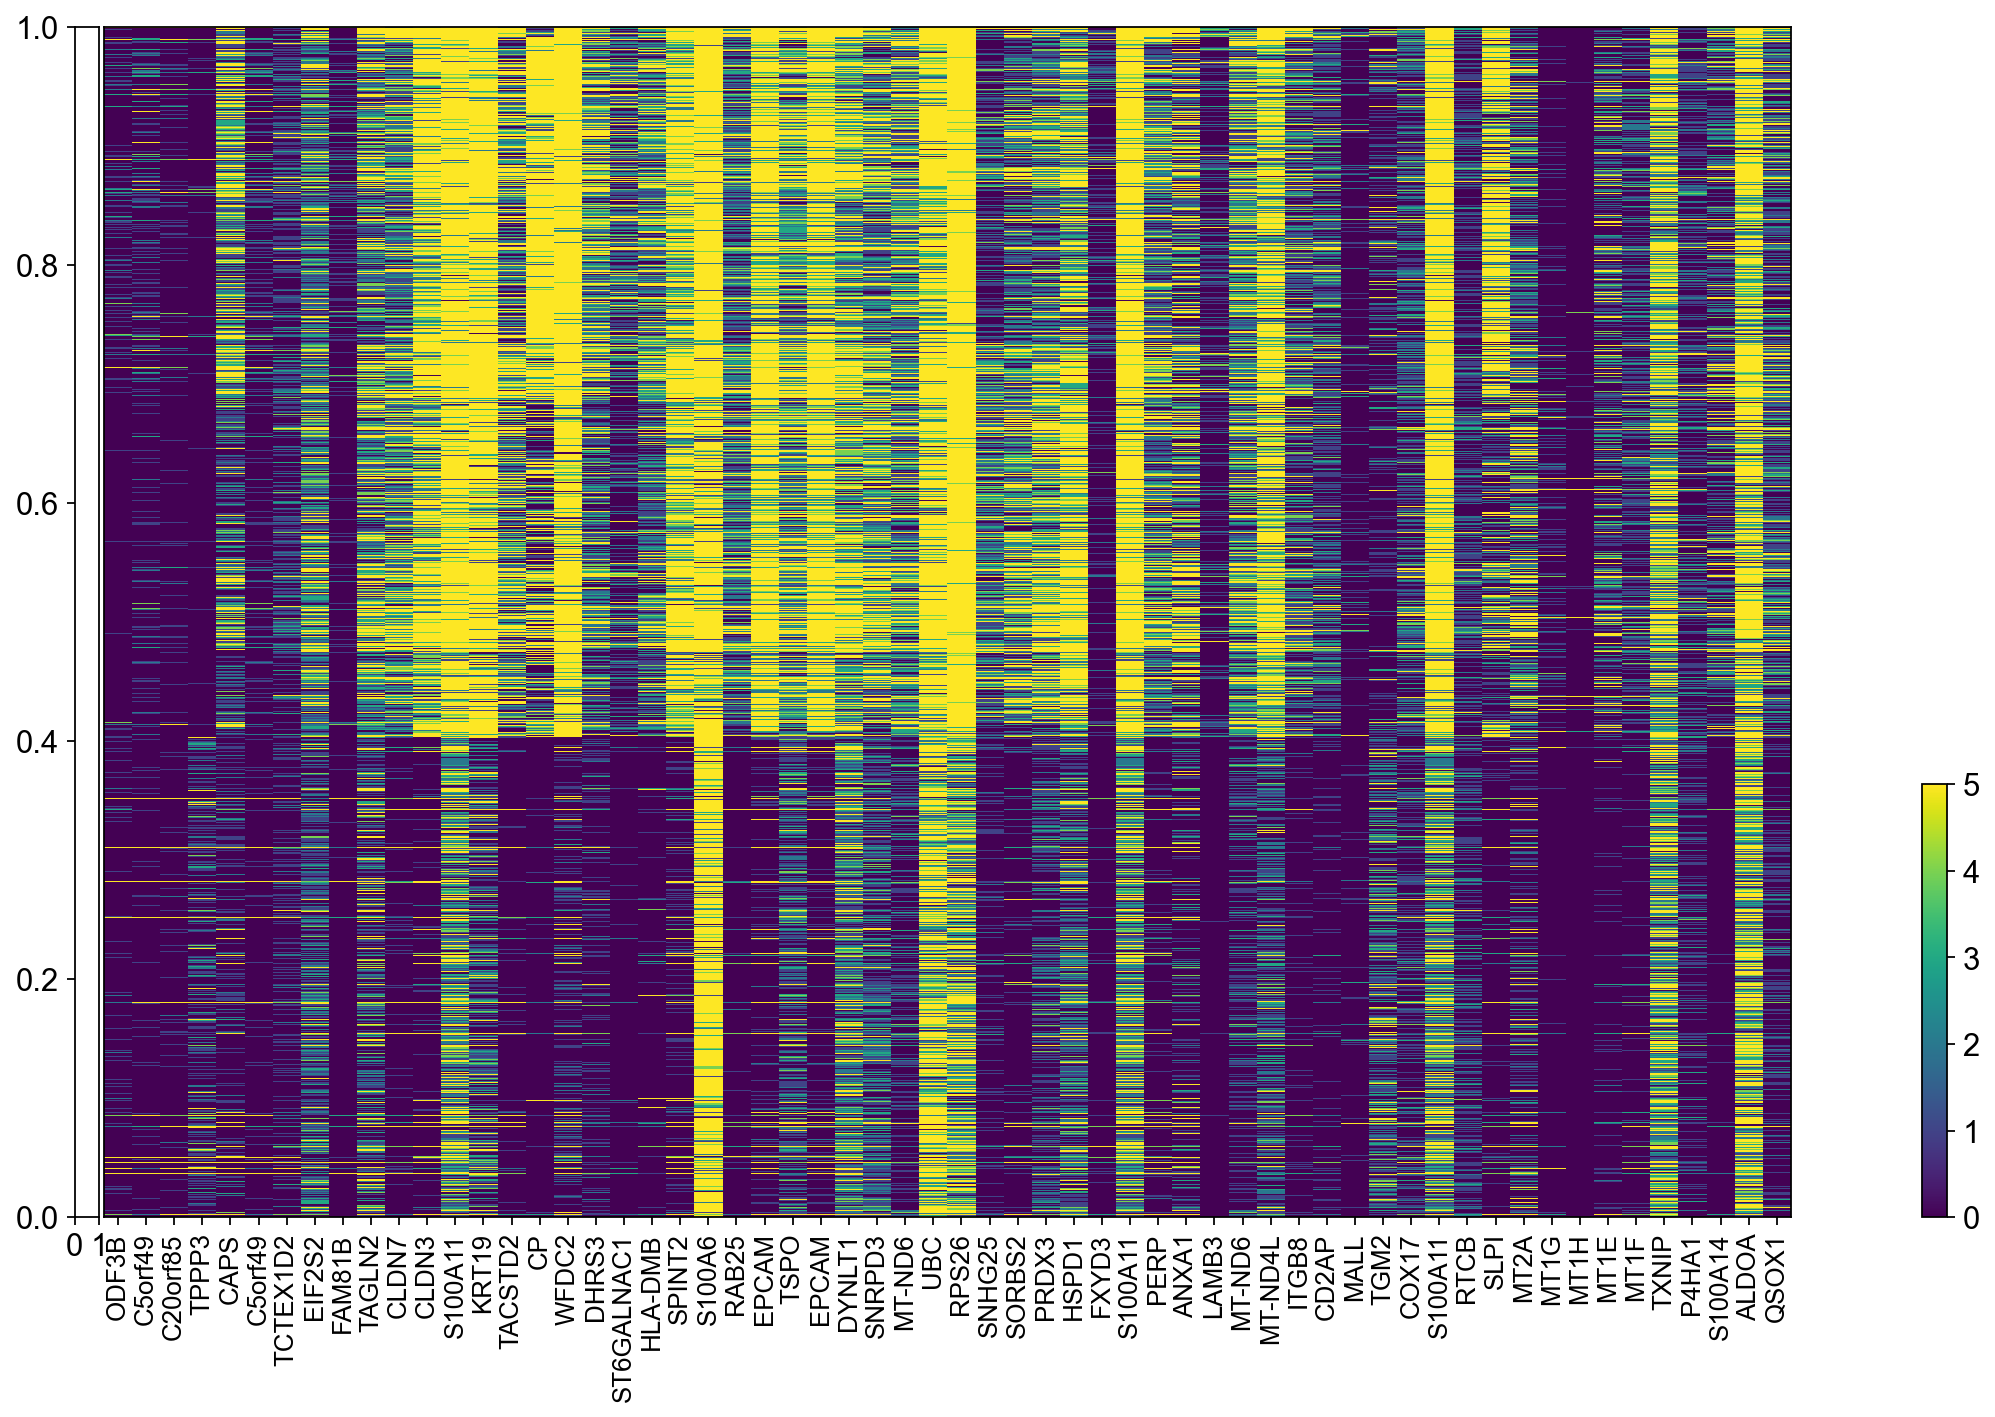

In [178]:
sc.tl.rank_genes_groups(adata_pro_or_merged, 'Celltype')
sc.pl.rank_genes_groups_heatmap(adata_pro_or_merged, n_genes=5, show_gene_labels=True, vmax=5, figsize=[15,10])

## 7. Comparing the merged Pro and Sec Samples using other plots:

In [ ]:
    #quick way to check the expression of genes

sc.pl.dotplot(adata, marker_genes, 'clusters', dendrogram=True)

## matrixplot

In [ ]:
sc.pl.matrixplot(adata, marker_genes, 'clusters', dendrogram=True, cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')

# scale and store results in layer
pbmc.layers['scaled'] = sc.pp.scale(pbmc, copy=True).X

sc.pl.matrixplot(adata, marker_genes, 'clusters', dendrogram=True,
                 colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r')

## Heatmaps

In [ ]:
ax = sc.pl.heatmap(adata, marker_genes, groupby='clusters', cmap='viridis', dendrogram=True, swap_axes=True)

sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=3, use_raw=False, swap_axes=True, vmin=-3, vmax=3, cmap='bwr', layer='scaled', figsize=(10,7), show=False);